In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"D:\Github\Data-Science-And-Machine-Learning-Course\Datasets\Social_Network_Ads.csv")

In [3]:
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [4]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [5]:
#as dataset looks imbalance so we can do both undersampling and oversampling for these

In [6]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
#we change gender into label, but instead of label encoder we can also use map feature
dataset["Gender"] = dataset["Gender"].map({"Male":0, "Female":1})

In [8]:
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0


In [9]:
X = dataset.drop(columns=["User ID", "Purchased"])
y = dataset["Purchased"]

In [16]:
import sys
!{sys.executable} -m pip install imbalanced-learn

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)


### Oversampling

In [46]:
#for oversampling as of now
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
ro_x , ro_y = ro.fit_resample(X, y)

In [47]:
ro_x.value_counts(), ro_y.value_counts()

(Gender  Age  EstimatedSalary
 1       27   96000              4
 0       49   89000              4
              28000              4
 1       53   82000              4
 0       60   42000              4
                                ..
         25   90000              1
 1       57   26000              1
         58   23000              1
              47000              1
         53   104000             1
 Name: count, Length: 379, dtype: int64,
 Purchased
 0    257
 1    257
 Name: count, dtype: int64)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# help(train_test_split)

In [50]:
 X_train, X_test, y_train, y_test = train_test_split(ro_x, ro_y, test_size=0.33, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression()

In [53]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
lr.score(X_test, y_test)

0.7764705882352941

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
y_pred = lr.predict(X_test)

In [57]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[73,  8],
       [30, 59]])

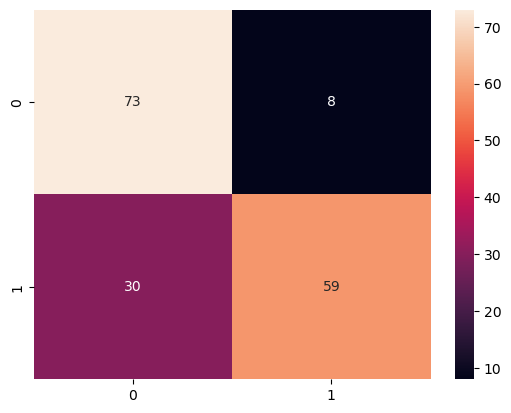

In [58]:
sns.heatmap(confusion, annot=True, fmt = "d")
plt.show()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        81
           1       0.88      0.66      0.76        89

    accuracy                           0.78       170
   macro avg       0.79      0.78      0.77       170
weighted avg       0.80      0.78      0.77       170



### Undersampling

In [60]:
from imblearn.under_sampling import RandomUnderSampler
ru = RandomUnderSampler()
ru_x , ru_y = ro.fit_resample(X,y)

In [61]:
 X_trainn, X_testt, y_trainn, y_testt = train_test_split(ru_x, ru_y, test_size=0.33, random_state=42)

In [62]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_trainn, y_trainn)